# Metrics Pset #4

### 1(a) Define running variable Xi = share of votes for the union relative to all votes cast; define cutoff c = 0.5

In [1]:
# !pip install rdrobust

In [2]:
# !pip install rddensity

In [3]:
# !pip install rdd

In [4]:
# !pip install numpy statsmodels

In [19]:
# pip install statsmodels

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from rdd import rdd
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('pset4_data.csv') 
# df.head()
print(df.columns)

Index(['nlrb_id', 'election_year', 'employer', 'state', 'county', 'industry',
       'eligible_voters', 'votes_for', 'votes_against', 'win', 'logwage'],
      dtype='object')


In [15]:
# Generate data for RDD
Xi = df['Xi'] = df['votes_for'] / (df['votes_for'] + df['votes_against']) # Running variable Xi
Wi = df['Wi'] = np.log(df['eligible_voters']) # Y 

cutoff = 0.5  # Cutoff where simple majority indicating union victory is reached
print(df.columns)

Index(['nlrb_id', 'election_year', 'employer', 'state', 'county', 'industry',
       'eligible_voters', 'votes_for', 'votes_against', 'win', 'logwage', 'Xi',
       'Wi'],
      dtype='object')


### (b) Covariate Wi = log eligible voters
### - Would checking whether E [Wi | Xi] is continuous at the cutoff be a useful placebo check for the RDD assumptions? 
Yes this is useful to to validate that in the absence of treatment, all other factors would remain continuous across the cutoff. This reduces the likelihood of mistaking a sharp turn for a jump.
- Xi=voting share 'for'    (We defined this as ratio)
- Wi=log of # eligible
### - Check visually and statistically
- See below.
- RD Plot with Parametric Fit and binned data: Shows discontinuity in regression E [Wi | Xi]; shows the global shape and nonlinearity of the regression; separately on the left and right of c, fitted values from Wi = α0 + α1(Xi − c) + · · · + αp(Xi − c)p + error
- Parametric fit scatter with binned data
- Local Polynomial Regression: Fit separate regressions to the data on either side of the cutoff and check if the estimated regression functions show a discontinuity at the cutoff.
- Density Test of the Running Variable: Check if the density of the running variable Xi is continuous around the cutoff and verify that there is no manipulation of the running variable.
### - Describe the tests you use
- T-test to compare the means of Wi just to the left and just to the right of the cutoff. The null hypothesis is that there is no difference in the means, meaning the line would be continous (no jump in the data).
- The binned RD scatter-plot checks for a jump in the conditional expectation of Wi at the cutoff (0.5). This way we estimate the conditional expectation on each side of the cutoff and then test if the difference is statistically significant.

C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MSalman\AppData\Local\Temp\ipykernel_32600\3091015861.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

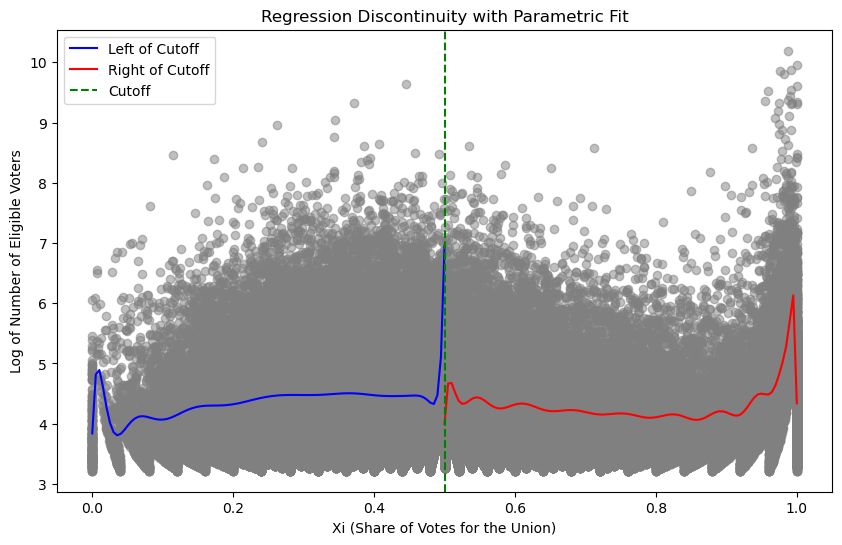

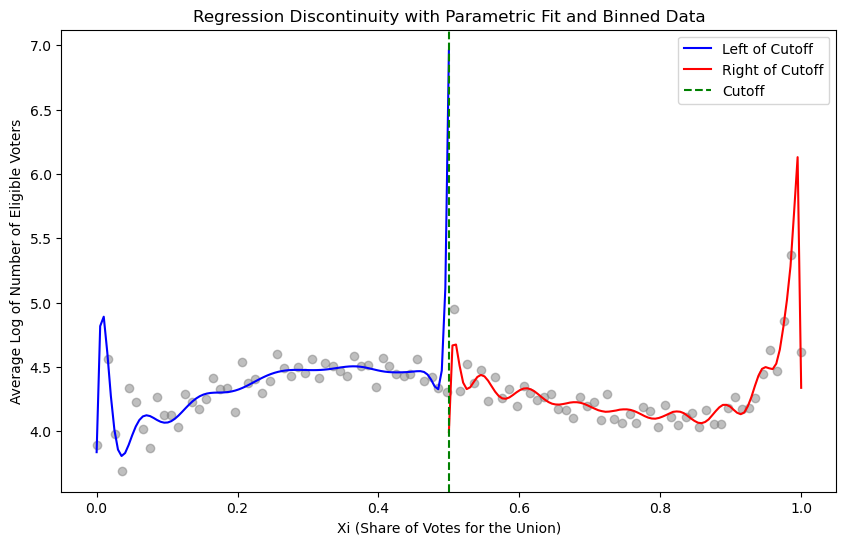

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit polynomial regression models on both sides of the cutoff
# Adjust the degree of the polynomial as needed
degree = 50
left_side = df[df['Xi'] < cutoff]
right_side = df[df['Xi'] >= cutoff]

# Polynomial terms for left side
for i in range(1, degree + 1):
    left_side[f'Xi_{i}'] = left_side['Xi'] ** i

# Polynomial terms for right side
for i in range(1, degree + 1):
    right_side[f'Xi_{i}'] = right_side['Xi'] ** i

# Fit the models
model_left = smf.ols(formula='log_eligible_voters ~ ' + ' + '.join([f'Xi_{i}' for i in range(1, degree + 1)]), data=left_side).fit()
model_right = smf.ols(formula='log_eligible_voters ~ ' + ' + '.join([f'Xi_{i}' for i in range(1, degree + 1)]), data=right_side).fit()

# Predictions for plotting
Xi_left = np.linspace(left_side['Xi'].min(), cutoff, 100)
Xi_right = np.linspace(cutoff, right_side['Xi'].max(), 100)
pred_left = model_left.predict(exog=dict([(f'Xi_{i}', Xi_left**i) for i in range(1, degree + 1)]))
pred_right = model_right.predict(exog=dict([(f'Xi_{i}', Xi_right**i) for i in range(1, degree + 1)]))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Xi'], df['log_eligible_voters'], color='grey', alpha=0.5)
plt.plot(Xi_left, pred_left, color='blue', label='Left of Cutoff')
plt.plot(Xi_right, pred_right, color='red', label='Right of Cutoff')
plt.axvline(x=cutoff, color='green', linestyle='--', label='Cutoff')
plt.xlabel('Xi (Share of Votes for the Union)')
plt.ylabel('Log of Number of Eligible Voters')
plt.title('Regression Discontinuity with Parametric Fit')
plt.legend()
plt.show()



# Assuming df is your DataFrame and it has the necessary columns
df['Xi'] = df['votes_for'] / (df['votes_for'] + df['votes_against'])
df['log_eligible_voters'] = np.log(df['eligible_voters'])

# Define the cutoff and number of bins
cutoff = 0.5
num_bins = 100

# Create bins
df['bin'] = pd.cut(df['Xi'], bins=num_bins)
binned_data = df.groupby('bin').agg({'log_eligible_voters': 'mean', 'Xi': 'mean'}).reset_index()

# ... [rest of the previous code for polynomial fitting] ...

# Plot
plt.figure(figsize=(10, 6))

# Plot binned data instead of individual observations
plt.scatter(binned_data['Xi'], binned_data['log_eligible_voters'], color='grey', alpha=0.5)

# Plotting the parametric fit lines
plt.plot(Xi_left, pred_left, color='blue', label='Left of Cutoff')
plt.plot(Xi_right, pred_right, color='red', label='Right of Cutoff')

plt.axvline(x=cutoff, color='green', linestyle='--', label='Cutoff')
plt.xlabel('Xi (Share of Votes for the Union)')
plt.ylabel('Average Log of Number of Eligible Voters')
plt.title('Regression Discontinuity with Parametric Fit and Binned Data')
plt.legend()
plt.show()

In [9]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming df is your DataFrame with columns Xi and log_eligible_voters
# Xi is the running variable, and the cutoff is defined at 0.5
cutoff = 0.5

# Choosing a bandwidth for the local regression
bandwidth = 0.05  # This can be adjusted based on your data

# Creating two subsets of data around the cutoff within the bandwidth
df_left = df[(df['Xi'] >= cutoff - bandwidth) & (df['Xi'] < cutoff)]
df_right = df[(df['Xi'] <= cutoff + bandwidth) & (df['Xi'] > cutoff)]

# Defining the local linear regression model
# Left of the cutoff
model_left = smf.ols(formula='log_eligible_voters ~ Xi', data=df_left).fit()
# Right of the cutoff
model_right = smf.ols(formula='log_eligible_voters ~ Xi', data=df_right).fit()

# Print summary of models
print("Model Left of Cutoff:\n", model_left.summary())
print("\nModel Right of Cutoff:\n", model_right.summary())

Model Left of Cutoff:
                              OLS Regression Results                            
Dep. Variable:     log_eligible_voters   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     10.98
Date:                 Sun, 03 Dec 2023   Prob (F-statistic):           0.000928
Time:                         19:22:55   Log-Likelihood:                -7727.8
No. Observations:                 6019   AIC:                         1.546e+04
Df Residuals:                     6017   BIC:                         1.547e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.12

## (c) 
### - Check if the density of Xi is continuous around the cutoff (vis and stat) 
### - Describe the tests you use and their key parameters (e.g. choice of kernel)

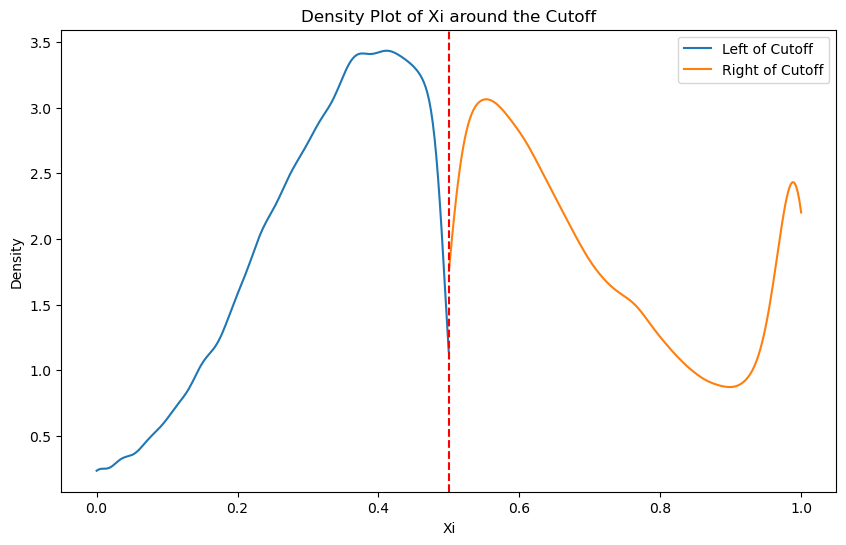

In [27]:
# density plot
cutoff = 0.5
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Xi'] < cutoff]['Xi'], label="Left of Cutoff", cut = 0)
sns.kdeplot(df[df['Xi'] >= cutoff]['Xi'], label="Right of Cutoff", cut = 0)
plt.axvline(x=cutoff, color='red', linestyle='--')
plt.title('Density Plot of Xi around the Cutoff')
plt.xlabel('Xi')
plt.ylabel('Density')
plt.legend()
plt.show()

In [24]:
df[df['Xi'] < cutoff]['Xi']

0        0.487179
2        0.405405
6        0.137931
9        0.272727
10       0.486486
           ...   
76727    0.156863
76733    0.487179
76736    0.377778
76737    0.263636
76739    0.372093
Name: Xi, Length: 41656, dtype: float64

In [25]:
df

,nlrb_id,election_year,employer,state,county,industry,eligible_voters,votes_for,votes_against,win,logwage,Xi,Wi,log_eligible_voters,bin
0,A-100007u6,1980,PREMIER FABRICS INC,CT,CT ct new haven,222,61,19,20,0,11.852283,0.487179,4.110874,4.110874,"(0.48, 0.49]"
1,A-100009u6,1976,PREMIER INC,IN,IN in marion,344,54,27,20,1,11.065499,0.574468,3.988984,3.988984,"(0.57, 0.58]"
2,A-100012u6,1963,PREMIER INDUSTRIES,KY,KY ky kenton,264,83,30,44,0,11.500877,0.405405,4.418841,4.418841,"(0.4, 0.41]"
3,A-100013u6,1970,PREMIER INDUSTRIES CORP,MI,MI mi monroe,355,47,24,18,1,10.518431,0.571429,3.850148,3.850148,"(0.57, 0.58]"
4,A-100014u6,1965,PREMIER INDUSTRIES INC,KY,KY ky kenton,264,59,33,25,1,11.981100,0.568966,4.077537,4.077537,"(0.56, 0.57]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76735,B-9515779uA,1990,AMERICARE PINE LODGE NURSING & REHAB,WV,WV raleigh,805,68,39,27,1,10.551718,0.590909,4.219508,4.219508,"(0.59, 0.6]"
76736,B-9515793uT,1990,"MONARCH HARDWARE & MFG., CO., INC.",OH,OH columbiana,342,50,17,28,0,10.920714,0.377778,3.912023,3.912023,"(0.37, 0.38]"
76737,B-9515803uA,1990,"SERVEND INTERNATIONAL, INC.",IN,IN clark,735,116,29,81,0,11.538478,0.263636,4.753590,4.753590,"(0.26, 0.27]"
76738,B-9601577uA,1990,"ARKAY PLASTICS, INC.",OH,OH butler,371,217,98,97,1,11.110626,0.502564,5.379897,5.379897,"(0.5, 0.51]"


In [17]:
# rdensoty test 
from rdrobust import rddensity
import numpy as np
Xi = df['Xi'].to_numpy()
rdd_result = rddensity(Xi, c=cutoff)
print(rdd_result)

ImportError: cannot import name 'rddensity' from 'rdrobust' (C:\Users\MSalman\anaconda3\Lib\site-packages\rdrobust\__init__.py)

In [12]:
cutoff = 0.5

# Split the data around the cutoff
left_of_cutoff = df[df['Xi'] < cutoff]['Xi']
right_of_cutoff = df[df['Xi'] >= cutoff]['Xi']

# Fit KDE to data on either side of the cutoff
kde_left = KDEUnivariate(left_of_cutoff)
kde_left.fit(bw="scott")  # You can adjust the bandwidth as necessary
kde_right = KDEUnivariate(right_of_cutoff)
kde_right.fit(bw="scott")  # You can adjust the bandwidth as necessary

# Preparing data for seaborn lineplot
left_kde_data = pd.DataFrame({'Xi': kde_left.support, 'Density': kde_left.density, 'Side': 'Left of Cutoff'})
right_kde_data = pd.DataFrame({'Xi': kde_right.support, 'Density': kde_right.density, 'Side': 'Right of Cutoff'})
kde_data = pd.concat([left_kde_data, right_kde_data])

# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=kde_data, x='Xi', y='Density', hue='Side')
plt.axvline(x=cutoff, color='red', linestyle='--')
plt.title('Density Plot of Xi around the Cutoff')
plt.xlabel('Xi')
plt.ylabel('Density')
plt.legend()
plt.show()

NameError: name 'KDEUnivariate' is not defined

## (d) 
### - Drop tied elections, i.e. those with same nr votes for and against
### - Repeat tests from questions 1(b) and 1(c)
### - Do results change? Explain.

## (e) 
### - For this part only, redefine running variable as  difference between votes for and against, in levels
### - What is the relevant cutoff now? 
### Test for continuity of mean firm size around the cutoff
### Show the density around the cutoff (without a statistical test)
### - Discuss the pros/ cons of defining the running variable as a share or level in this setting.

## (f) 
### - From 1(a)–(e), what do you conclude about the validity of the close-election RD design in this setting?

## 2. Now let’s estimate the effect of having a union on (fake) log wages.

## (a) 
### - Analyze the causal effect visually and report the estimate of the causal effect and the confidence interval for it. 
### - Describe the procedures you use and their key parameters, even if using default values. ## - Can you reject a zero effect against the alternative that it is greater than zero? Describe how you perform the test.

## (b) 
### - What exactly is the estimand of your procedure in 2(a)? Does it capture larger or smaller firms than all firms in the data?

## (c) 
### - Is your estimate in question 2(a) sensitive to the choice of the kernel function (while using bandwidth optimized for each kernel)?

## (d)
### - Check robustness of your estimates in question 2(a) to the choice of the bandwidth and report it graphically. 
### - What do you conclude?

## (e) 
### - For another placebo test that we didn’t cover in the lecture, researchers sometimes report estimates when cutoff is changed to an arbitrary value ˜c ̸= c. To avoid contamination, only the untreated sample is used for ˜c < c and only the treated sample is used for ˜c > c. Perform this placebo check for a few values of ˜c, choosing them in a way that ensures reasonable number of observations on both sides. Report the results graphically, juxtaposing the actual estimate (and its confidence interval) with the placebo ones. What do you conclude?